In [1]:
# import all required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# Load dataset

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.513322,1.534503,-1.961756,2.808717,-0.244137,2.079253,0.649463,0.430845,-0.551920,-0.519743,1.308382,1.362770,3.294215,1.791794,-0.490214,-0.425220
1,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.319736,-0.303513,-0.291913,-0.072944,-0.135460,-0.764303,-0.733799,-0.303562,1.791794,-0.490214,2.351725
2,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.237012,-0.184391,-0.426380,-0.360330,1.017391,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.425220
3,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.636844,0.570048,0.262761,-0.392262,-0.135460,1.308382,1.362770,3.294215,1.791794,2.039924,-0.425220
4,0.767154,1.534503,0.509748,-0.356034,4.096069,1.872444,-0.442488,0.027445,-0.360330,0.556250,1.308382,-0.733799,3.294215,-0.558100,-0.490214,-0.425220


In [4]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.416247,-0.144683,-0.342338,0.086715,-0.442887,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.42522
1,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,2.258488,-0.422635,-0.090213,-0.104876,-0.135460,1.308382,1.362770,-0.303562,1.791794,-0.490214,-0.42522
2,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.181863,-0.561610,-0.409572,0.086715,0.095110,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.42522
3,-0.725182,-0.391148,0.509748,-0.356034,-0.244137,-0.774717,-0.303513,-0.426380,-0.360330,-0.519743,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.42522
4,0.020986,1.534503,0.509748,-0.356034,-0.244137,2.272276,1.106097,-0.022980,-0.679648,1.709101,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.42522


In [5]:
y_train.head(5)

,class
0,0
1,0
2,1
3,0
4,0


In [6]:
y_test.head(5)

,class
0,1
1,0
2,1
3,1
4,0


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 16), (80, 16), (320, 1), (80, 1))

# Building Basic Model

In [8]:
models = {'Logistic Regression': LogisticRegression(n_jobs=-1),
          'DT classifier': DecisionTreeClassifier(),
          'Support Vector Classifier': SVC(),
          'Naive Bayes': GaussianNB(),
          'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
          'AdaBoost Classifier': AdaBoostClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          'XG Boost Classifier': XGBClassifier(n_jobs=-1)}

In [9]:
from sklearn.metrics import accuracy_score
def model_train_eval(X_train,y_train, X_test,y_test, models):
    evaluation = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        model_score = accuracy_score(y_test,y_pred)
        evaluation[list(models.keys())[i]] = model_score
    return evaluation

In [10]:
model_train_eval(X_train,y_train, X_test,y_test, models)

{'Logistic Regression': 0.9,
 'DT classifier': 0.9375,
 'Support Vector Classifier': 0.9125,
 'Naive Bayes': 0.95,
 'Random Forest Classifier': 0.9625,
 'AdaBoost Classifier': 0.9625,
 'Gradient Boosting Classifier': 0.9625,
 'XG Boost Classifier': 0.9875}

we are giving good accuracy but the data can be some overfitting 

# Hyperparameter Tuning

## Logistic Regression

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report

params = {
    'penalty': ('l1', 'l2', 'elasticnet', None),
    'C': [1,2,10,20,30,40]
}

Logistic_Regression = LogisticRegression()
log_clf = GridSearchCV(Logistic_Regression, param_grid= params, cv = 5, n_jobs=-1)
log_clf.fit(X_train,y_train)
best_log_clf = log_clf.best_estimator_
y_pred_logistic = best_log_clf.predict(X_test)

log_clf_acc = accuracy_score(y_test, y_pred_logistic)

print(f"Accuracy: {log_clf_acc}")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy: 0.9625
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.92      1.00      0.96        33

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[44  3]
 [ 0 33]]


## Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

# PrePruning using hyperparameter tuning

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt', 'log2', 'auto']
}

DT_Classifier = DecisionTreeClassifier()
DT_clf = GridSearchCV(DT_Classifier, param_grid=params, cv =5, scoring='accuracy', n_jobs=-1)
DT_clf.fit(X_train,y_train)
best_DTC = DT_clf.best_estimator_
y_pred_DTC = best_DTC.predict(X_test)

DT_clf_acc = accuracy_score(y_test, y_pred_DTC)

print(f"Accuracy: {DT_clf_acc}")
print(classification_report(y_test, y_pred_DTC))
print(confusion_matrix(y_test, y_pred_DTC))

Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.89      0.97      0.93        33

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

[[43  4]
 [ 1 32]]


## SVM Classifier

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': [ 'rbf']}

svm_classifier = SVC()
svc = RandomizedSearchCV(svm_classifier, param_distributions=params, cv = 5, verbose = 3, scoring='accuracy', n_jobs=-1)
svc.fit(X_train, y_train)
best_svc = svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

svm_classifier_acc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy: {svm_classifier_acc}")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

[[45  2]
 [ 0 33]]


## Gaussian Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

params ={
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

gaussian_nb = GaussianNB()
gnb = GridSearchCV(gaussian_nb, param_grid=params, cv=5)
gnb.fit(X_train, y_train)
best_gnb = gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)

gnb_acc = accuracy_score(y_test, y_pred_gnb)

print(f"Accuracy: {gnb_acc}")
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.89      1.00      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

[[43  4]
 [ 0 33]]


## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [1,2,3,4,5,6,7,None],
    'n_estimators': [50,100,200,300],
    'criterion': ['gini', 'entropy']
}

RandomForest_Classifier = RandomForestClassifier(oob_score=True, n_jobs=-1)
rfc = GridSearchCV(RandomForest_Classifier, param_grid=params, cv=5)
rfc.fit(X_train, y_train)
best_rfc = rfc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)

rfc_acc = accuracy_score(y_test, y_pred_rfc)

print("Out-of-Bag Score: ", best_rfc.oob_score_)
print(f"Accuracy: {rfc_acc}")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Out-of-Bag Score:  0.95625
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

[[45  2]
 [ 0 33]]


## AdaBoost Classifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01,0.1,1.0,1.5,2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

AdaBoost_Classifier = AdaBoostClassifier()
adaboost = GridSearchCV(estimator= AdaBoost_Classifier, param_grid= params, cv=5, verbose= 3, n_jobs= -1)
adaboost.fit(X_train,y_train)
best_adaboost = adaboost.best_estimator_
y_pred_adaboost = best_adaboost.predict(X_test)

adaboost_acc = accuracy_score(y_test, y_pred_adaboost)

print(f"Accuracy: {adaboost_acc}")
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

[[45  2]
 [ 0 33]]


## Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 0.05,0.2],
    'max_depth': [3,4,5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

gb_classifier = GradientBoostingClassifier()
gbc = RandomizedSearchCV(gb_classifier, param_distributions=params, cv = 5, verbose = 3, scoring='accuracy')
gbc.fit(X_train,y_train)
best_gbc = gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)

gbc_acc = accuracy_score(y_test, y_pred_gbc)

print(f"Accuracy: {gbc_acc}")
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0;, score=0.938 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0;, score=0.953 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0;, score=0.969 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0;, score=0.969 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0;, score=0.969 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8;, score=0.938 total time=   0.3s
[CV 2/5] END learning

## XGBoost Classifier

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01,0.05,0.5,0.2],
    'max_depth': [3,5,7,9],
    'gamma': [0,0.1,0.5,1],
    'reg_alpha': [0,0.1,0.5,1],
    'reg_lambda': [1,1.5,2,3]
}

xgb_clf = XGBClassifier()
xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=params, cv=5, verbose=3, scoring='accuracy', n_jobs=-1)
xgb.fit(X_train, y_train)

best_xgb = xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Accuracy: {xgb_acc}")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

[[45  2]
 [ 0 33]]


# Model Evaluation

In [19]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Decision Tree Classifier', 'SVM Classifier', 'Naive Bayes', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XGBoost Classifier'],
    'Score' : [log_clf_acc, DT_clf_acc, svm_classifier_acc, gnb_acc, rfc_acc, adaboost_acc, gbc_acc, xgb_acc]
})




# Sort the models DataFrame by 'Score' in descending order
models = models.sort_values('Score', ascending=False)

models

,Model,Score
2,SVM Classifier,0.9750
7,XGBoost Classifier,0.9750
5,Ada Boost Classifier,0.9750
4,Random Forest Classifier,0.9750
0,Logistic Regression,0.9625
3,Naive Bayes,0.9500
6,Gradient Boosting Classifier,0.9500
1,Decision Tree Classifier,0.9375


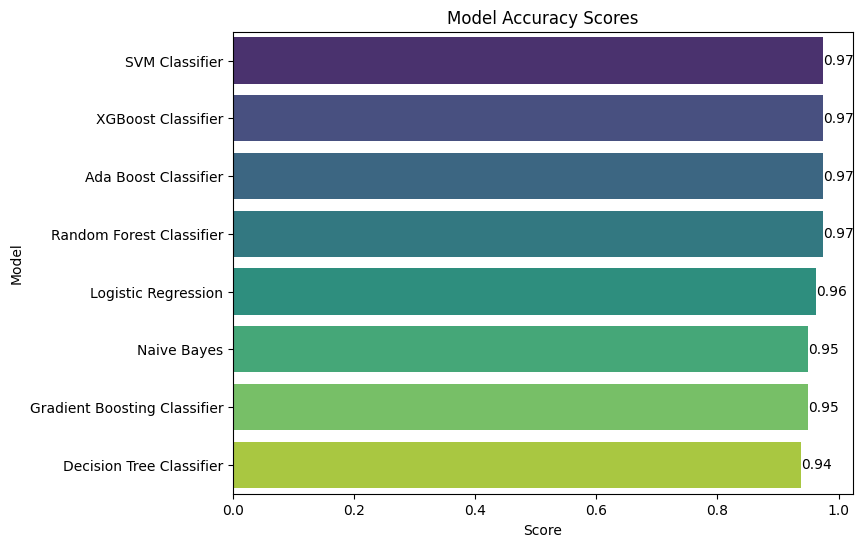

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot 
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Score', y='Model', data= models, palette='viridis')

# Add value labels on top of the bars
for p in ax.patches:
    # Get the position of each bar
    width = p.get_width()
    # Position the text in the middle of each bar
    ax.text(width , p.get_y() + p.get_height() / 2, 
            f'{width:.2f}', ha='left', va='center', fontsize=10)
    
plt.title("Model Accuracy Scores")
plt.show()

## SVM, XGBoost Classifier, Ada Boost Classifier, and Random Forest Classifier are getting Highest Accuracy score